# Fixed boundaries - run04

This run has fixed boundary conditions u,v and initial conditions from CNTDIFF run42, day 3. The fields were the same cross section taken at day 3. This experiment ran in bugaboo.

In [2]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [3]:
# files for run with fixed boundaries 
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run04/gridGlob.nc'
state_file = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run04/stateGlob.nc'
ptracers_file = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run04/ptracersGlob.nc'

grid = xr.open_dataset(grid_file)
state = xr.open_dataset(state_file)
ptracers = xr.open_dataset(ptracers_file)

# files for original run with body forcing
state_file_bf = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 
ptracers_file_bf = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc'

state_bf = xr.open_dataset(state_file_bf)
ptracers_bf = xr.open_dataset(ptracers_file_bf)

## Let's see what did the model read

In [4]:
u_0 = state.U.isel(Xp1=120, T=0)
v_0 = state.V.isel(X=120, T=0)

u_Wbdy = state.U.isel(Xp1=0, T=0)
v_Wbdy = state.V.isel(X=0, T=0)

u_Ebdy = state.U.isel(Xp1=360, T=0)
v_Ebdy = state.V.isel(X=359, T=0)

Temp_0 = state.Temp.isel(X=120, T=0)
S_0 = state.S.isel(X=120, T=0)
Tr_0 = ptracers.Tr1.isel(X=120, T=0)

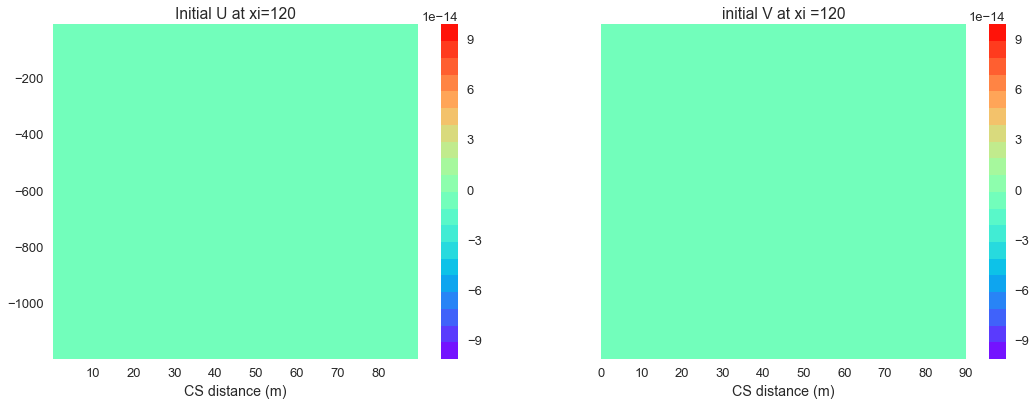

In [5]:
sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,u_0,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial U at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Yp1/1000,grid.RC,v_0,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('initial V at xi =120')
ax[1].set_xlabel('CS distance (m)')


Within the domain, one third of the total alongshore distance, the initial speeds u,v are zero.

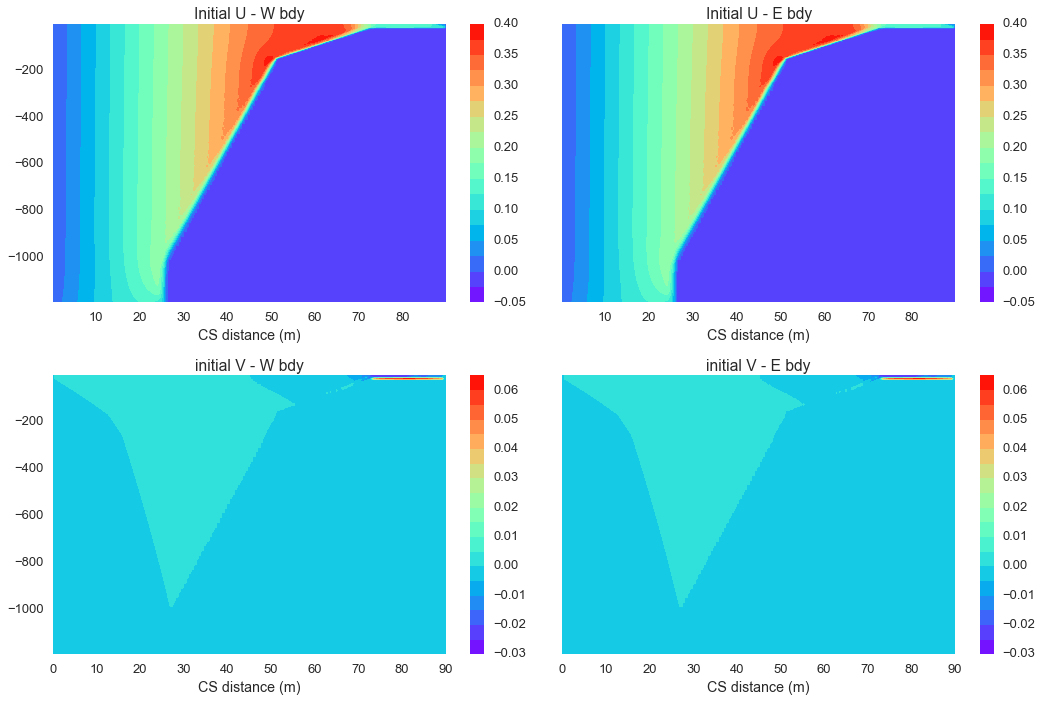

In [6]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(15,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Initial U - W bdy')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V - W bdy')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy,20, cmap = 'rainbow')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U - E bdy')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy,20, cmap = 'rainbow')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V - E bdy')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


At the western and eastern boundaries, the initial velocities are not zero. They have an along shelf/slope current with the coast on the left and a small off-shore velocity over the shelf. They are equal to keep the water fluxes balanced in the domain.

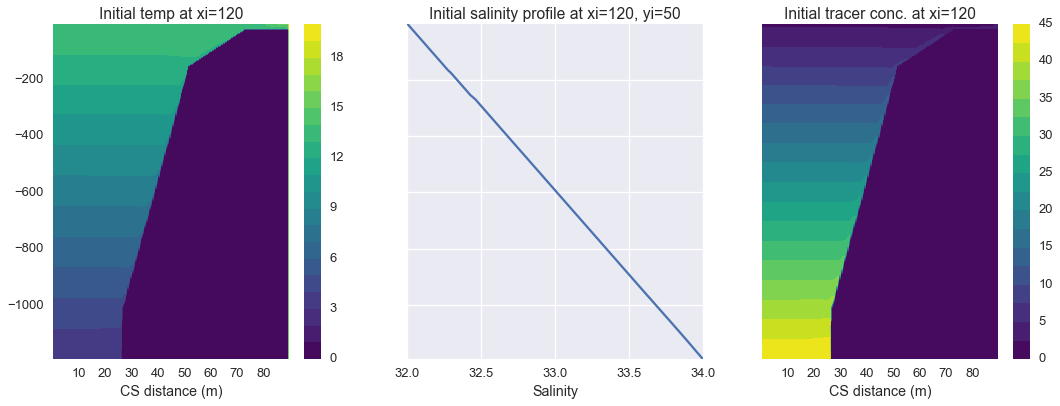

In [7]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_0,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

pl1 = ax[1].plot(S_0[:,50],grid.RC)
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_0,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')



The initial tremperature, salinity and tracer profiles are tilted close to the bottom of the shelf and slope as in an upwelling event

 ###  U and V frrom body forcing vs  fixed boundaries 

In [12]:
# fixed bdy case - boundaries on day 3
u_Wbdy_d3 = state.U.isel(Xp1=2, T=6)
v_Wbdy_d3 = state.V.isel(X=2, T=6)

u_Ebdy_d3 = state.U.isel(Xp1=357, T=6)
v_Ebdy_d3 = state.V.isel(X=357, T=6)

# fixed bdy case - boundaries on day 6
u_Wbdy_d6 = state.U.isel(Xp1=2, T=12)
v_Wbdy_d6 = state.V.isel(X=2, T=12)

u_Ebdy_d6 = state.U.isel(Xp1=357, T=12)
v_Ebdy_d6 = state.V.isel(X=357, T=12)

# fixed bdy case - boundaries on day 9
u_Wbdy_d9 = state.U.isel(Xp1=2, T=18)
v_Wbdy_d9 = state.V.isel(X=2, T=18)

u_Ebdy_d9 = state.U.isel(Xp1=357, T=18)
v_Ebdy_d9 = state.V.isel(X=357, T=18)


# fixed bdy case - mid alongshore distance, day 3
u_mid_d3 = state.U.isel(Xp1=180, T=6)
v_mid_d3 = state.V.isel(X=180, T=6)

# fixed bdy case - mid alongshore distance, day 6
u_mid_d6 = state.U.isel(Xp1=180, T=12)
v_mid_d6 = state.V.isel(X=180, T=12)

# fixed bdy case - mid alongshore distance, day 6
u_mid_d9 = state.U.isel(Xp1=180, T=18)
v_mid_d9 = state.V.isel(X=180, T=18)


# body forcing case on day 6
ubf_Wbdy_d6 = state_bf.U.isel(Xp1=2, T=12)
vbf_Wbdy_d6 = state_bf.V.isel(X=2, T=12)

ubf_Ebdy_d6 = state_bf.U.isel(Xp1=357, T=12)
vbf_Ebdy_d6 = state_bf.V.isel(X=357, T=12)

# body forcing case on day 9
ubf_Wbdy_d9 = state_bf.U.isel(Xp1=2, T=18)
vbf_Wbdy_d9 = state_bf.V.isel(X=2, T=18)

ubf_Ebdy_d9 = state_bf.U.isel(Xp1=357, T=18)
vbf_Ebdy_d9 = state_bf.V.isel(X=357, T=18)

# body forcing case - mid alongshore distance, day 6
ubf_mid_d6 = state_bf.U.isel(Xp1=180, T=12)
vbf_mid_d6 = state_bf.V.isel(X=180, T=12)

# body forcing case - mid alongshore distance, day 9
ubf_mid_d9 = state_bf.U.isel(Xp1=180, T=18)
vbf_mid_d9 = state_bf.V.isel(X=180, T=18)


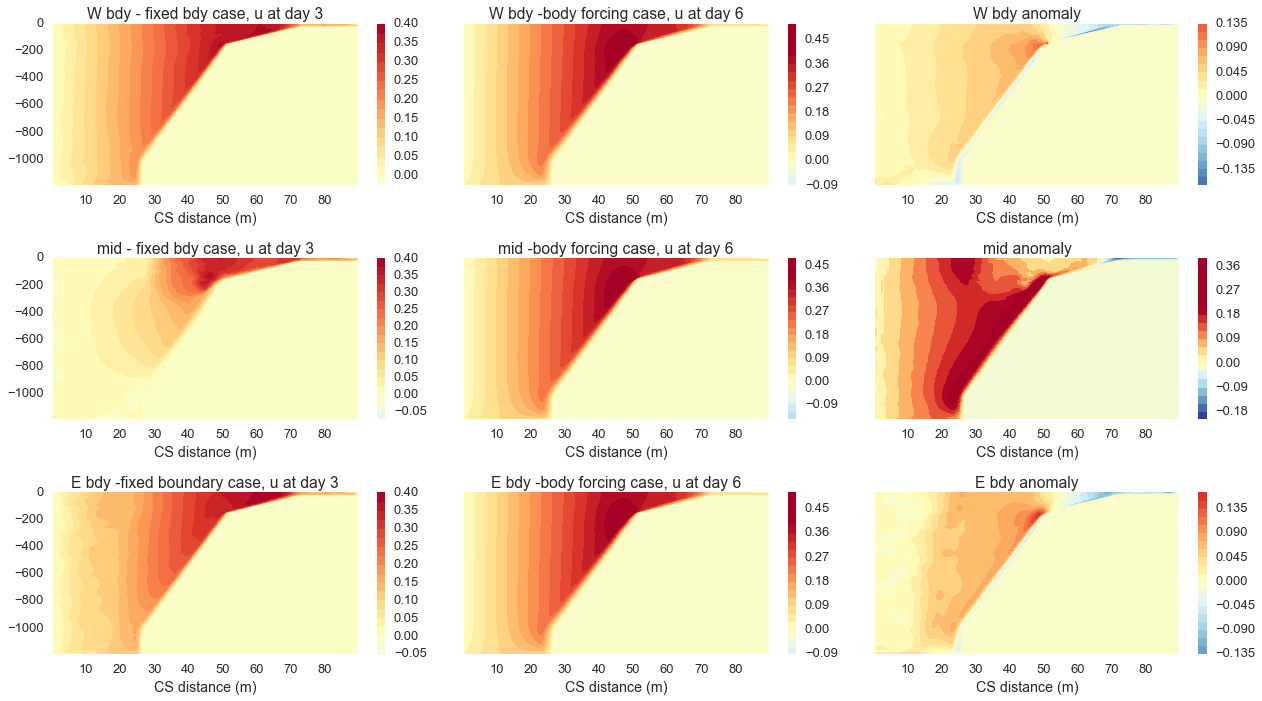

In [9]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, u at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d6-u_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d6-u_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d6-u_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


In this plot alongshore velocity of the fixed boundary case on day 3 is compared to alongshore volocity of the body forcing case on day 6. The mismatch in the days is becuase velocities at day 3 of the body forcing case were used as the fixed boundaries for run03. I want to see how different is the evolution of the two systems so I compare them after 3 days. 


I plotted $u$ close to the west boundary at the top, mid alongshore distance in the middle and u close to the east boundary at the bottom. The plots for the fixed boundary case are on the left column; the ones for the body forcing case are on the center; and the anomalies, that is $u_{BF}-u_{fix}$, are on the right.

Near the boundaries, both flows are similar in structure, but the shelf current in the BF case is stronger by about 25% at the shelf break and about 10% more intense on the slope. Also, the shelf current is less intense in the BF case than in the FBdy case.

The alongshore velocity at mid alongshore distance in the fixed boundary case decreases dramatically on the slope with respect to the BF case!

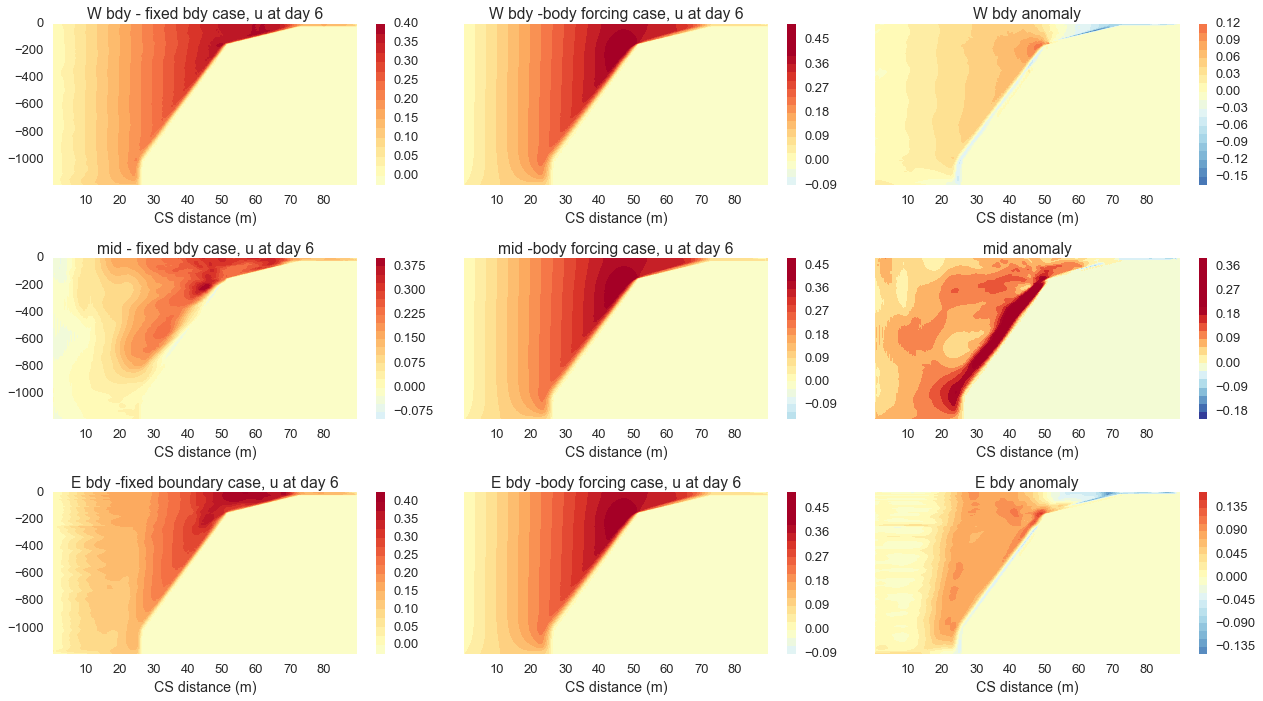

In [10]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, u at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d6-u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d6-u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d6-u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


In this plot alongshore velocity of the fixed boundary case on day 6 is compared to alongshore volocity of the body forcing case on day 6. 

The differences nead the boundaires are similar to day3 vs day 6 but the alongshore current at mid distance in the fixed bdy case extends deeper on the slope. 

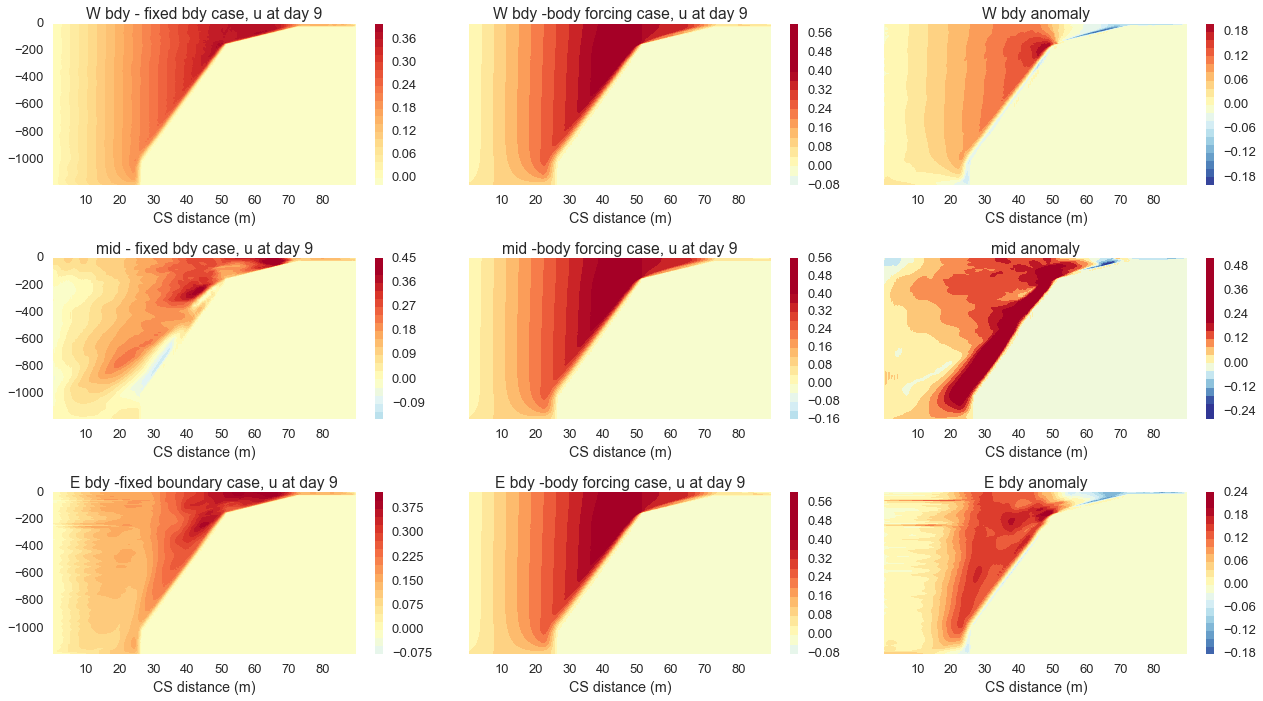

In [13]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, u at day 9')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, u at day 9')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, u at day 9')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, u at day 9')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ubf_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, u at day 9')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, u at day 9')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_Wbdy_d9-u_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,ubf_mid_d9-u_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,ubf_Ebdy_d9-u_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


In this plot alongshore velocity of the fixed boundary case on day 9 is compared to alongshore volocity of the body forcing case on day 9. 

* The body forcing case has accelerated! (Because there is some body forcing still pushing). 

* The fixed boundary case developed a small countercurrent on the slope at mid distance.

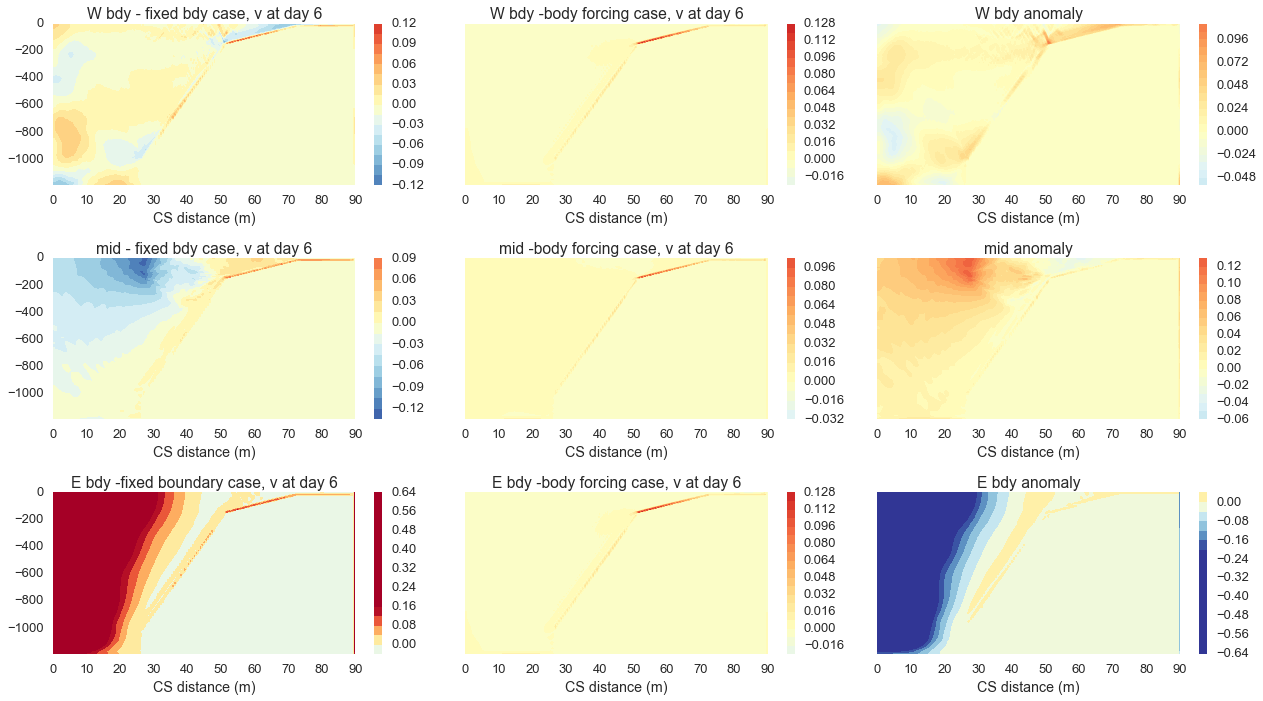

In [14]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, v at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, v at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, v at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Yp1/1000,grid.RC,vbf_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, v at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,vbf_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, v at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Yp1/1000,grid.RC,vbf_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, v at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Yp1/1000,grid.RC,vbf_Wbdy_d6-v_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Yp1/1000,grid.RC,vbf_mid_d6-v_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Yp1/1000,grid.RC,vbf_Ebdy_d6-v_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


What is this, precious!!??

## Tracers

In [15]:
# fixed bdy case - day 3
T_Wbdy_d3 = state.Temp.isel(X=2, T=6)
S_Wbdy_d3 = state.S.isel(X=2, T=6)
Tr_Wbdy_d3 = ptracers.Tr1.isel(X=2, T=6)

T_Ebdy_d3 = state.Temp.isel(X=357, T=6)
S_Ebdy_d3 = state.S.isel(X=357, T=6)
Tr_Ebdy_d3 = ptracers.Tr1.isel(X=357, T=6)

T_mid_d3 = state.Temp.isel(X=180, T=6)
S_mid_d3 = state.S.isel(X=180, T=6)
Tr_mid_d3 = ptracers.Tr1.isel(X=180, T=6)

# fixed bdy case - day 6
T_Wbdy_d6 = state.Temp.isel(X=2, T=12)
S_Wbdy_d6 = state.S.isel(X=2, T=12)
Tr_Wbdy_d6 = ptracers.Tr1.isel(X=2, T=12)

T_Ebdy_d6 = state.Temp.isel(X=357, T=12)
S_Ebdy_d6 = state.S.isel(X=357, T=12)
Tr_Ebdy_d6 = ptracers.Tr1.isel(X=357, T=12)

T_mid_d6 = state.Temp.isel(X=180, T=12)
S_mid_d6 = state.S.isel(X=180, T=12)
Tr_mid_d6 = ptracers.Tr1.isel(X=180, T=12)

# fixed bdy case -  day 9
T_Wbdy_d9 = state.Temp.isel(X=2, T=18)
S_Wbdy_d9 = state.S.isel(X=2, T=18)
Tr_Wbdy_d9 = ptracers.Tr1.isel(X=2, T=18)

T_Ebdy_d9 = state.Temp.isel(X=357, T=18)
S_Ebdy_d9 = state.S.isel(X=357, T=18)
Tr_Ebdy_d9 = ptracers.Tr1.isel(X=357, T=18)

T_mid_d9 = state.Temp.isel(X=180, T=18)
S_mid_d9 = state.S.isel(X=180, T=18)
Tr_mid_d9 = ptracers.Tr1.isel(X=180, T=18)


In [16]:
# BF case -  day 6
Tbf_Wbdy_d6 = state_bf.Temp.isel(X=2, T=12)
Sbf_Wbdy_d6 = state_bf.S.isel(X=2, T=12)
Trbf_Wbdy_d6 = ptracers_bf.Tr1.isel(X=2, T=12)

Tbf_Ebdy_d6 = state_bf.Temp.isel(X=357, T=12)
Sbf_Ebdy_d6 = state_bf.S.isel(X=357, T=12)
Trbf_Ebdy_d6 = ptracers_bf.Tr1.isel(X=357, T=12)

Tbf_mid_d6 = state_bf.Temp.isel(X=180, T=12)
Sbf_mid_d6 = state_bf.S.isel(X=180, T=12)
Trbf_mid_d6 = ptracers_bf.Tr1.isel(X=180, T=12)

#  BF -  day 9
Tbf_Wbdy_d9 = state_bf.Temp.isel(X=2, T=18)
Sbf_Wbdy_d9 = state_bf.S.isel(X=2, T=18)
Trbf_Wbdy_d9 = ptracers_bf.Tr1.isel(X=2, T=18)

Tbf_Ebdy_d9 = state_bf.Temp.isel(X=357, T=18)
Sbf_Ebdy_d9 = state_bf.S.isel(X=357, T=18)
Trbf_Ebdy_d9 = ptracers_bf.Tr1.isel(X=357, T=18)

Tbf_mid_d9 = state_bf.Temp.isel(X=180, T=18)
Sbf_mid_d9 = state_bf.S.isel(X=180, T=18)
Trbf_mid_d9 = ptracers_bf.Tr1.isel(X=180, T=18)


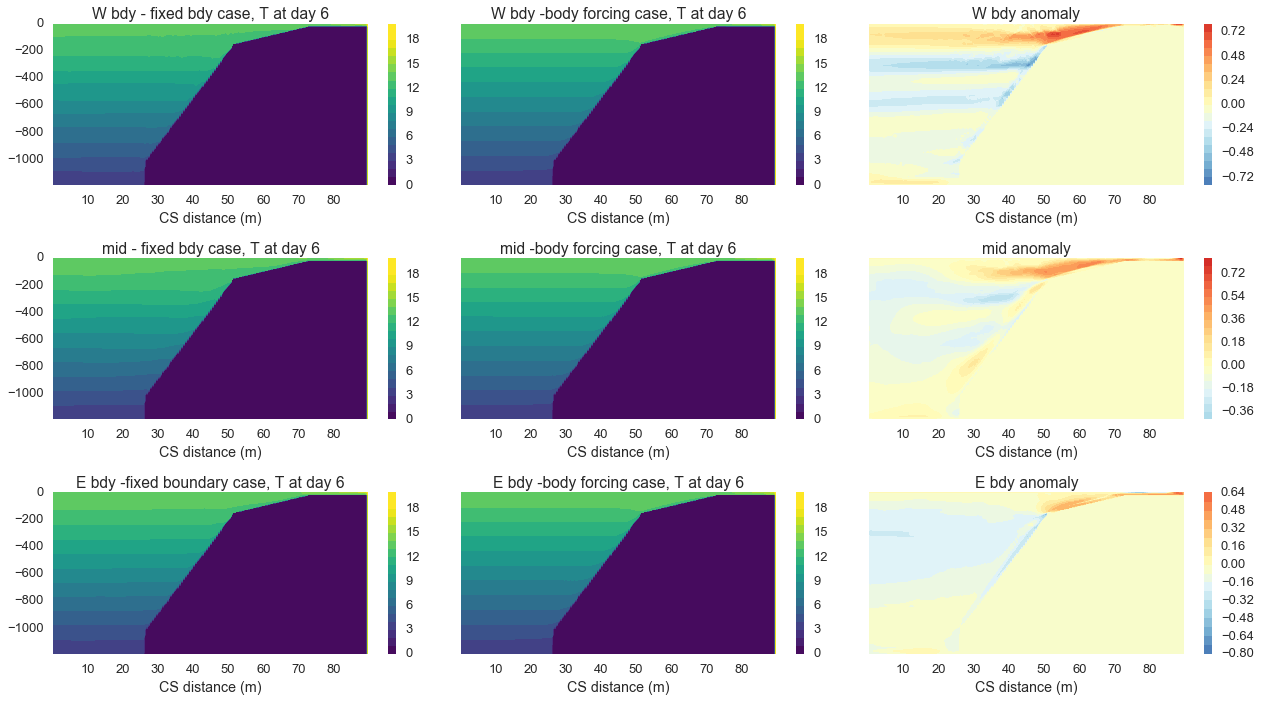

In [17]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,T_Wbdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, T at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,T_mid_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, T at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,T_Ebdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, T at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,Tbf_Wbdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, T at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,Tbf_mid_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, T at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,Tbf_Ebdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, T at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,Tbf_Wbdy_d6-T_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,Tbf_mid_d6-T_mid_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,Tbf_Ebdy_d6-T_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


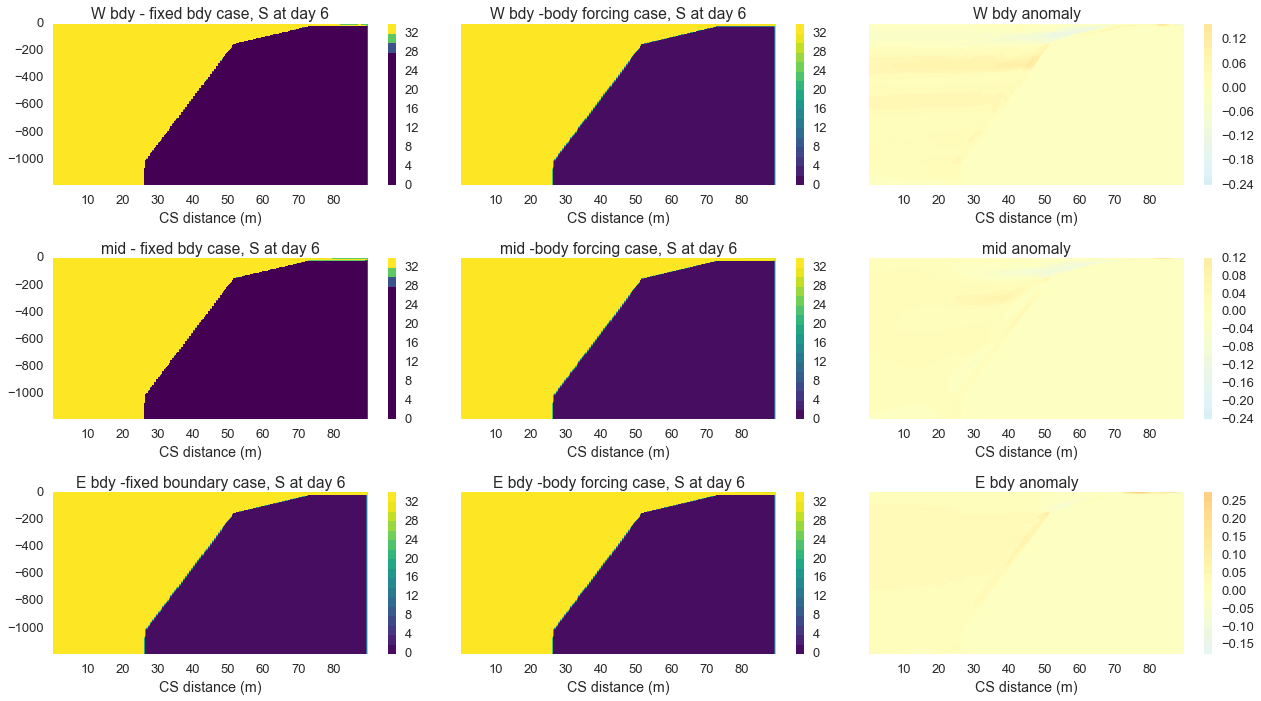

In [18]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,S_Wbdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 28)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - fixed bdy case, S at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,S_mid_d6,20, cmap = 'viridis', vmax = 32, vmin = 28)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - fixed bdy case, S at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,S_Ebdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -fixed boundary case, S at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,Sbf_Wbdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -body forcing case, S at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,Sbf_mid_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -body forcing case, S at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,Sbf_Ebdy_d6,20, cmap = 'viridis', vmax = 32, vmin = 0)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -body forcing case, S at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,Sbf_Wbdy_d6-S_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,Sbf_mid_d6-S_mid_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,Sbf_Ebdy_d6-S_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()
